In [1]:
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import pandas as pd
import sklearn as skl
from scipy import sparse
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.multitest import multipletests as multipletests
from scipy.stats import mannwhitneyu as mannwhitney
import scipy.stats as stats

# display the figure in the notebook
%matplotlib inline 

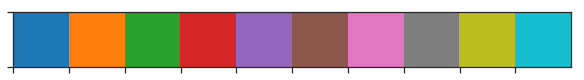

In [2]:
#define style
sns.set(rc={'figure.figsize':(20,3)})
sns.set_context("paper", rc={"font.size":18,"axes.titlesize":15,"axes.labelsize":20, "axes.ylabelsize":15, "axes.ticklabelsize":15}) 
sns.set(font_scale=1.5, font='helvetica')
sns.set_style("white")
sns.set_style("ticks")

#defining and setting color pallete
#flatui = ["#66c2a5","#fc8d62", "#8da0cb"]
#flatui = ["#1f78b4", "#b2df8a"]
sns.palplot(sns.color_palette("tab10", n_colors=10))
sns.set_palette(sns.color_palette("tab10", n_colors=10))

In [3]:
## load data with pandas as a dataframe (df)
## index_col=0 makes id as the index-column
filename = '../data/oa/20200207_data_1to53_merged_FINAL.csv'
df = pd.read_csv(filename,index_col=0)
df.Inst.unique()

array([' Dimensional Change Card Sort Test Age 12+ v2.1',
       ' Flanker Inhibitory Control and Attention Test Age 12+ v2.1',
       ' List Sorting Working Memory Test Age 7+ v2.1',
       ' Pattern Comparison Processing Speed Test Age 7+ Practice v2.1',
       ' Pattern Comparison Processing Speed Test Age 7+ v2.1',
       ' Picture Sequence Memory Test Age 8+ Form A v2.1',
       ' Picture Vocabulary Test Age 3+ v2.0',
       ' Picture Vocabulary Test Age 3+ v2.1',
       'Cognition Early Childhood Composite v1.1',
       'Cognition Fluid Composite v1.1', ' Anger-Affect CAT Age 18+ v2.0',
       ' Anger-Hostility FF Age 18+ v2.0',
       ' Anger-Physical Aggression FF Age 18+ v2.0',
       ' Emotional Support FF Age 18+ v2.0',
       ' Fear-Affect CAT Age 18+ v2.0',
       ' Fear-Somatic Arousal FF Age 18+ v2.0',
       ' Friendship FF Age 18+ v2.0',
       ' General Life Satisfaction CAT Age 18+ v2.0',
       ' Instrumental Support FF Age 18+ v2.0',
       ' Loneliness FF Age 18+ 

In [4]:
## load personal data:
pers_file = '../data/oa/20200207_oa_toolbox_personal_fixed_simple.csv'
df_pers = pd.read_csv(pers_file,index_col=0)
#df_pers.head()

In [5]:
#df_pers[df_pers.pre1_post2_hc0 == 0].describe()

### Checking HC age distribution:

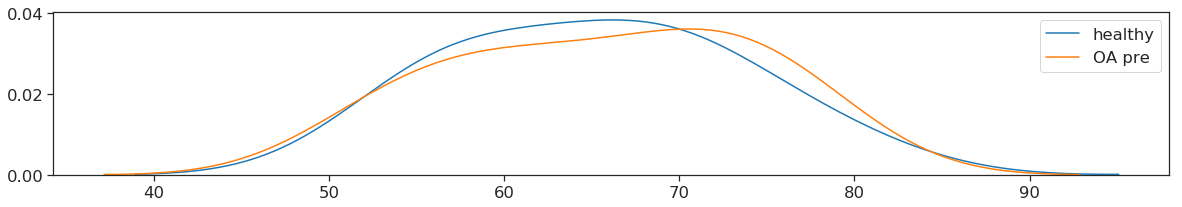

In [6]:
#sns.kdeplot(df_pers[df_pers.pre1_post2_hc0 == 0].age, shade=True)

sns.kdeplot(df_pers[df_pers.pre1_post2_hc0 == 0].age, label="healthy")
sns.kdeplot(df_pers[df_pers.pre1_post2_hc0 == 1].age, label="OA pre")
#sns.kdeplot(df_pers[df_pers.pre1_post2_hc0 == 2].age, label="OA post")
plt.legend();

In [7]:
## check non-personal data
#df.head()

## Plot data overview:

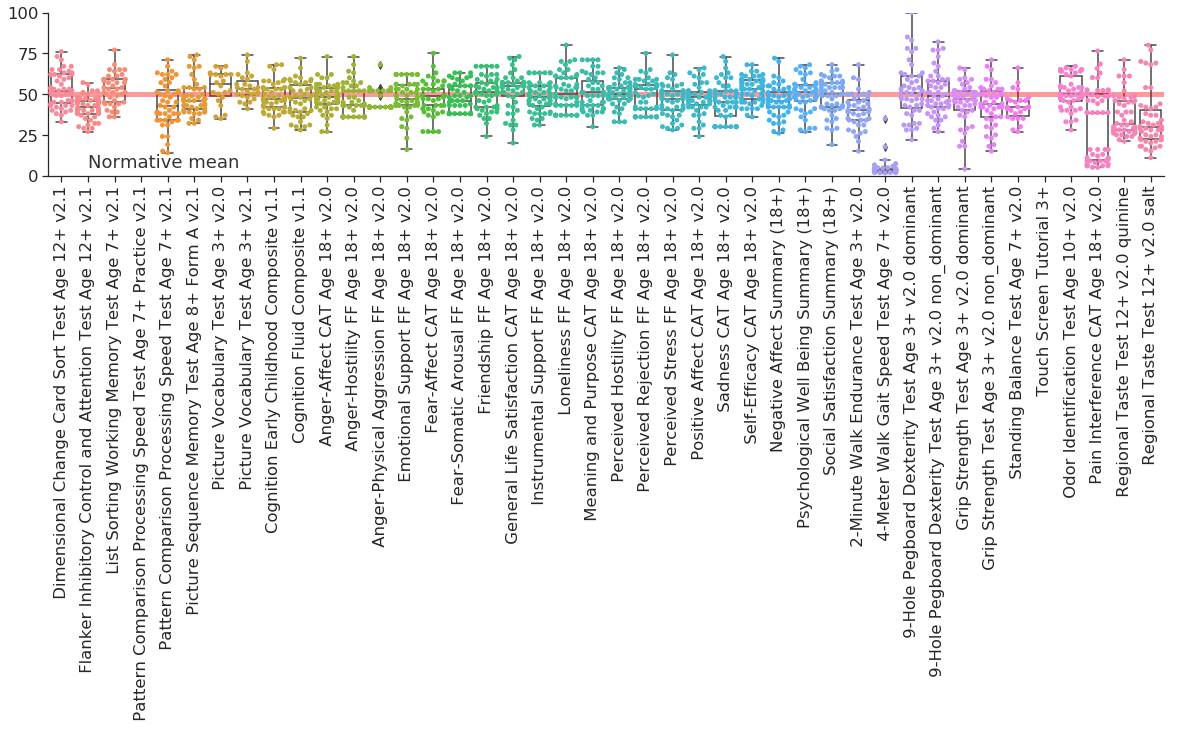

In [8]:
def swarm_plot(df):
    """prints a swarmplot with boxplot for all columns in a dataframe"""
    # plot:
    ax = sns.swarmplot(x="Inst", y="score", data=df)
    sns.boxplot("Inst", "score", data=df, boxprops={'facecolor':'None'}, whis=5)
    
    plt.ylim(0, 100)
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    #ax.set_xticklabels('')
    sns.despine()

    ax1 = ax.axes
    ax1.axhline(50, ls='-', color='red', alpha=.4, linewidth=5)
    ax1.text(1,5, "Normative mean", color='black', alpha=.8)
    
swarm_plot(df)

In [9]:
#drop certain Instruments (those that are not normalized t-scores):
df_sel = df[df["Inst"] != " Touch Screen Tutorial 3+"]
df_sel = df_sel[df_sel["Inst"] != " 4-Meter Walk Gait Speed Test Age 7+ v2.0"]
df_sel = df_sel[df_sel["Inst"] != " Pain Interference CAT Age 18+ v2.0"]
df_sel = df_sel[df_sel["Inst"] != "Cognition Early Childhood Composite v1.1"]
df_sel = df_sel[df_sel["Inst"] != "Cognition Fluid Composite v1.1"]
df_sel = df_sel[df_sel["Inst"] != "Negative Affect Summary (18+)"]
df_sel = df_sel[df_sel["Inst"] != "Psychological Well Being Summary (18+)"]
df_sel = df_sel[df_sel["Inst"] != "Social Satisfaction Summary (18+)"]
df_sel = df_sel[df_sel["Inst"] != " Picture Vocabulary Test Age 3+ v2.0"]
df_sel = df_sel[df_sel["Inst"] != " Picture Vocabulary Test Age 3+ v2.1"]
df_sel = df_sel[df_sel["Inst"] != " Pattern Comparison Processing Speed Test Age 7+ Practice v2.1"]

In [10]:
#df_sel.Inst.unique()

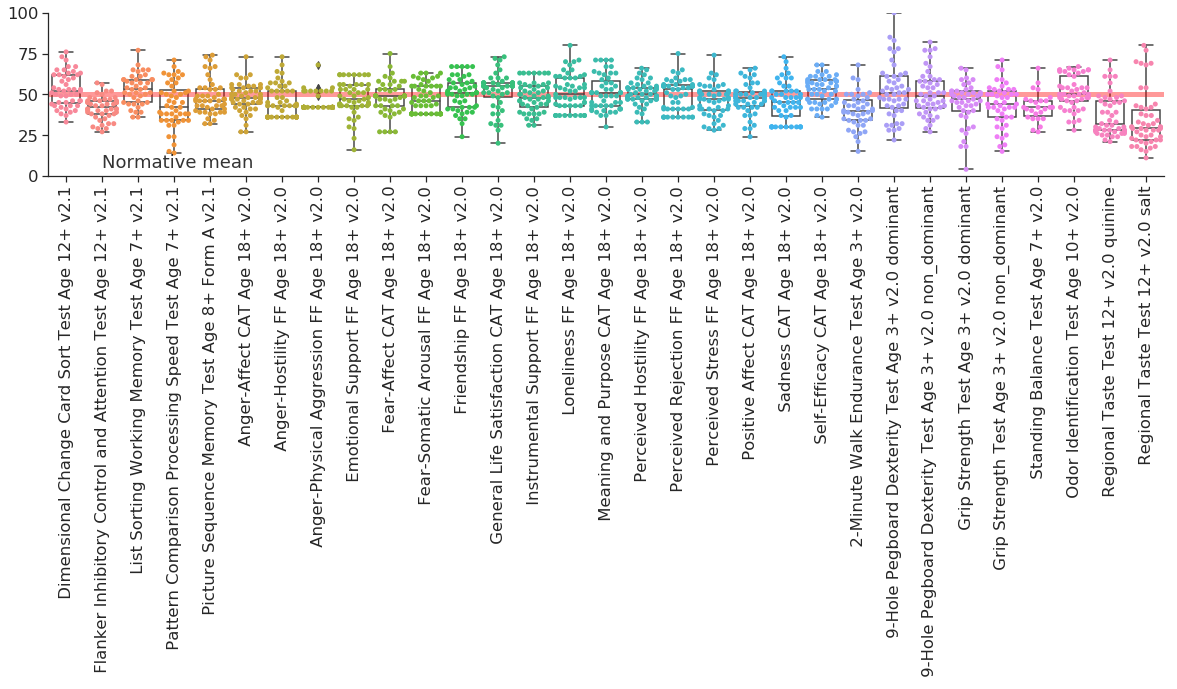

In [11]:
swarm_plot(df_sel)

In [12]:
## merge personal info qith actual data:
df_merg = pd.merge(df_sel, df_pers, how='outer', on='PIN')
#df_merg.head()

# lets plot before and after surgery values

In [13]:
## inspect all columns in the dataframe
df_merg.columns

Index(['Inst', 'score', 'categorie', 'cat_text', 'name', 'pre', 'post',
       'pre1_post2_hc0', 'notes', 'visit_date', 'surgery_date_left_knee',
       'surgery_date_right_knee', 'age', 'gender', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'SP1', 'SP2', 'SP3', 'SP4',
       'SP5', 'Q1', 'Q2', 'Q3', 'Q4', 'KOOS Pain', 'KOOS Symptom', 'KOOS ADL',
       'KOOS Sport/Rec', 'KOOS QOL'],
      dtype='object')

In [14]:
## Select OA:
df_oa = df_merg[df_merg['pre1_post2_hc0'] >= 1]
df_oa_pre = df_oa[df_oa['pre1_post2_hc0'] == 1]
df_oa_post = df_oa[df_oa['pre1_post2_hc0'] == 2]

#df_oa_pre

## Select HC:
df_hc = df_merg[df_merg['pre1_post2_hc0'] == 0]
#df_hc

In [15]:
def viol_plot(df):
    """prints a violinplot with boxplot for all columns in a dataframe"""
    
    flatui = ["#8da0cb", "#fc8d62"]
    sns.set_palette(sns.color_palette(flatui))
  
    ax = sns.violinplot(x="Inst", y="score", hue="pre1_post2_hc0", data=df, split=True, inner="stick") #size=4, aspect = 4, inner=None,
    
    ax.set_xlabel('')
    plt.title('Chronic osteoarthritis pain')

    plt.ylim(-0, 100)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    
    labels = ['Dim. Change Card Sort', 
              'Flanker In. Con. & Attention', 'List Sort Working Memory',
              'Pattern Comparison Speed', 'Picture Sequence Memory', 'Anger-Affect', 'Anger-Hostility',
              'Anger-Physical Aggression', 'Emotional Support', 'Fear-AffectA', 'Fear-Somatic Arousal',
              'Friendship', 'General Life Satisfaction', 'Instrumental Support', 'Loneliness', 
              'Meaning and Purpose', 'Perceived Hostility', 'Perceived Rejection',
              'Perceived Stress',  'Positive Affect', 
              'Sadness',  'Self-Efficacy', '2-minute Walk Endurance',
              '9-Hole Pegboard - Dom', '9-Hole Pegboard - NonDom', 'Grip Strength - Dom',
              'Grip Strength - NonDom', 'Standing Balance', 'Odor Identification', 
              'Regional Taste - Quinine', 'Regional Taste - Salt']

    ax.set_xticklabels(labels,rotation=90)
    
    #plt.xlabel='Chronic back pain (n=73)'
    sns.despine()

    ax1 = ax.axes
    ax1.axhline(50, color='red', alpha=.4, linewidth=5)
    ax1.text(2,10, "Normative mean", color='black', alpha=.8) #alpha=.4, fontweight='bold'  
    
#viol_plot(df_oa)

#plt.savefig('../figures/OA_pre_post_20191112.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/OA_pre_post_20191112.pdf', dpi=150, bbox_inches='tight')

In [16]:
#df_oa.columns
#df_oa.groupby('pre1_post2_hc0').age.describe()
#df_oa.groupby('pre1_post2_hc0').gender.describe()

## plot one metric only, before and after 

In [17]:
def viol_one(df):
    """prints a violinplot with boxplot for one columns in a dataframe"""
    
    #sns.set(rc={'figure.figsize':(2,100)})
    sns.set_context("paper", rc={"font.size":18,"axes.titlesize":15,"axes.labelsize":20, "axes.ylabelsize":15, "axes.ticklabelsize":15}) 
    sns.set(font_scale=1.5, font='helvetica')
    sns.set_style("white")
    sns.set_style("ticks")
    #sns.palplot(sns.color_palette("tab10", n_colors=10))
    sns.set_palette(sns.color_palette("tab10", n_colors=10))
    
    plt.figure(figsize=(2, 3))
  
    ax = sns.violinplot(x="Inst", y="score", hue="pre1_post2_hc0", data=df, split=True, inner="stick") #, inner=None,
    
    ax.set_xlabel('')
    plt.title('OA')

    plt.ylim(-0, 35)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    
    #label = ['Pain interference']

    ax.set_xticklabels('')
    ax.set_ylabel('Pain interference')
    #plt.gca().legend().set_title('')
    ax.legend_.remove()
    
    #plt.xlabel='Chronic back pain (n=73)'
    sns.despine()

    #ax1 = ax.axes
    #ax1.axhline(50, ls='-', color='red', alpha=.4, linewidth=5)
    #ax1.text(2,10, "Normative mean", color='black', alpha=.8) #alpha=.4, fontweight='bold'  

In [18]:
#df_oa_pain = df_oa[df_oa["Inst"] == "Pain Interference CAT Age 18+ v2.0"]

#viol_one(df_oa_pain)

#plt.savefig('../figures/OA_pain_interference_20191127.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/OA_pain_interference_20191127.pdf', dpi=150, bbox_inches='tight')

In [19]:
#def run_ttest_ind(df1,df2)
#ttest_ind(df1, df2, nan_policy='omit')

## Let's plot pre-surgery only: 

In [20]:
def swarm_plot(df):
    """prints a swarmplot with boxplot for all columns in a dataframe"""
    ax = sns.swarmplot(x="Inst", y="score", data=df, size=6, alpha=0.8)
    sns.boxplot("Inst", "score", data=df, boxprops={'facecolor':'None'}, whis=15, linewidth=2)
    
    plt.ylim(0, 100)
    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    
    labels = ['Dim. Change Card Sort', 
              'Flanker In. Con. & Attention', 'List Sort Working Memory',
              'Pattern Comparison Speed', 'Picture Sequence Memory', 'Anger-Affect', 'Anger-Hostility',
              'Anger-Physical Aggression', 'Emotional Support', 'Fear-AffectA', 'Fear-Somatic Arousal',
              'Friendship', 'General Life Satisfaction', 'Instrumental Support', 'Loneliness', 
              'Meaning and Purpose', 'Perceived Hostility', 'Perceived Rejection',
              'Perceived Stress',  'Positive Affect', 
              'Sadness',  'Self-Efficacy', '2-minute Walk Endurance',
              '9-Hole Pegboard - Dom', '9-Hole Pegboard - NonDom', 'Grip Strength - Dom',
              'Grip Strength - NonDom', 'Standing Balance', 'Odor Identification', 
              'Regional Taste - Quinine', 'Regional Taste - Salt']

    ax.set_xticklabels(labels,rotation=90)
    
    #ax.set_xticklabels('')
    sns.despine()

    ax1 = ax.axes
    ax1.axhline(50, ls='-', color='red', alpha=.4, linewidth=5)
    ax1.text(1,5, "Normative mean", color='black', alpha=.8)

#swarm_plot(df_oa_pre)

#plt.title('Chronic osteoarthritis pain - pre-TKR (n=20)')

#plt.savefig('../figures/swarmplot_pre_OA_20191112.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/swarmplot_pre_OA_20191112.pdf', dpi=150, bbox_inches='tight')

In [21]:
#swarm_plot(df_oa_post)

#plt.title('Chronic osteoarthritis pain - post-TKR (n=21)')

#plt.savefig('../figures/swarmplot_post_OA_20200210.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/swarmplot_post_OA_20200210.pdf', dpi=150, bbox_inches='tight')

## Let's plot our local healthy: 

Text(0.5, 1.0, 'Local healthy controls (n=10)')

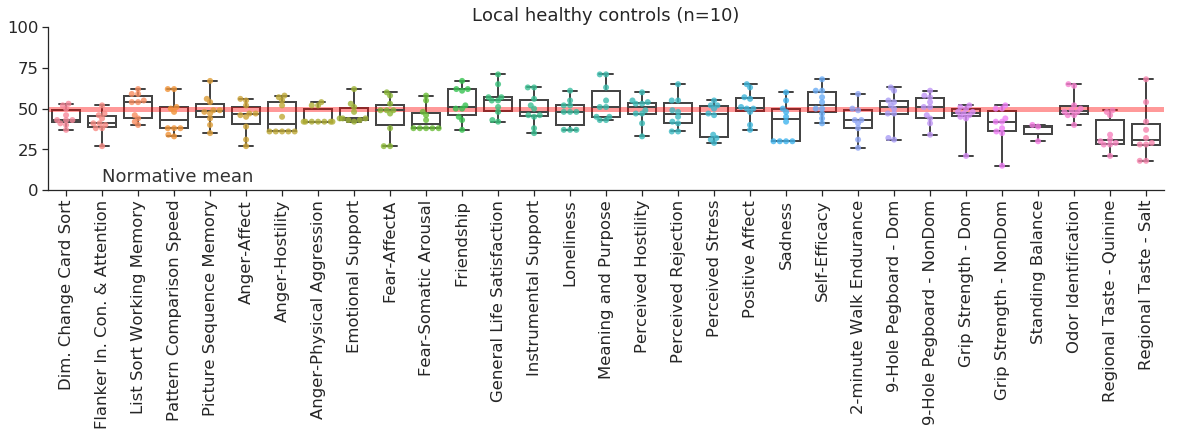

In [22]:
swarm_plot(df_hc)
plt.title('Local healthy controls (n=10)')

#plt.savefig('../figures/swarmplot_healthy_20200210.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/swarmplot_healthy_20200210.pdf', dpi=150, bbox_inches='tight')

Text(0.5, 1.0, 'Chronic osteoarthritis pain - all (n=41)')

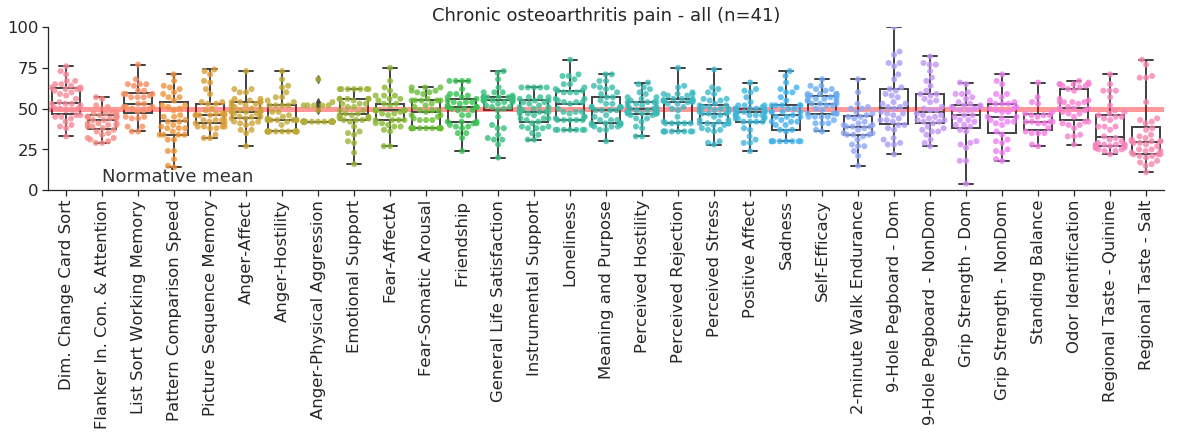

In [23]:
swarm_plot(df_oa)

plt.title('Chronic osteoarthritis pain - all (n=41)')

#plt.savefig('../figures/swarmplot_all_OA_20200210.png', dpi=150, bbox_inches='tight')
#plt.savefig('../figures/swarmplot_all_OA_20200210.pdf', dpi=150, bbox_inches='tight')

In [24]:
df_oa.columns

Index(['Inst', 'score', 'categorie', 'cat_text', 'name', 'pre', 'post',
       'pre1_post2_hc0', 'notes', 'visit_date', 'surgery_date_left_knee',
       'surgery_date_right_knee', 'age', 'gender', 'S1', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'SP1', 'SP2', 'SP3', 'SP4',
       'SP5', 'Q1', 'Q2', 'Q3', 'Q4', 'KOOS Pain', 'KOOS Symptom', 'KOOS ADL',
       'KOOS Sport/Rec', 'KOOS QOL'],
      dtype='object')

In [25]:
#reshaping df for statistics and vizualization
df_oa_reshape = df_oa.pivot_table(index=['PIN', 'pre1_post2_hc0'], columns='Inst', values='score').reset_index()
#df_oa_reshape = df_oa.pivot_table(index=['PIN', 'pre1_post2_hc0', 'age', 'gender', 'time_posttkr'], columns='Inst', values='score').reset_index()
df_oa_reshape.head()

df_oa_reshape.set_index('PIN', inplace=True)
cols = list(df_oa_reshape.columns.values)
#cols

##df_reshape = df_reshape[['ID', 'PDt', 'Assessment Name', 'PDtgroup', 'PSM', 'DCCS', 'FICA', 'LSWM', 'PCPS', 'AA', 'AH', 'APA',
##       'SAD', 'FA', 'FSA', 'GLS', 'MP', 'PA', 'FRD', 'LLN', 'ES', 'PH', 'IS',
##       'PS', 'PR', 'SE', 'TMW', 'PBD', 'PBND', 'GSD', 'GSND', 'SB', 'RTQ',
##       'RTS', 'OI']]

#df_oa_reshape.head()

In [26]:
#reshaping df for statistics and vizualization
df_hc_reshape = df_hc.pivot_table(index=['PIN', 'pre1_post2_hc0'], columns='Inst', values='score').reset_index()
df_hc_reshape.head()

df_hc_reshape.set_index('PIN', inplace=True)
cols = list(df_hc_reshape.columns.values)

In [27]:
#reshaping df for statistics and vizualization
df_all_reshape = df_merg.pivot_table(index=['PIN', 'pre1_post2_hc0'], columns='Inst', values='score').reset_index()
df_all_reshape.head()

df_all_reshape.set_index('PIN', inplace=True)
cols = list(df_all_reshape.columns.values)

In [28]:
df_reshape_pre = df_oa_reshape[df_oa_reshape.pre1_post2_hc0 == 1]
df_reshape_post = df_oa_reshape[df_oa_reshape.pre1_post2_hc0 == 2]
df_reshape_hc = df_hc_reshape[df_hc_reshape.pre1_post2_hc0 == 0]
#df_reshape_hc

In [29]:
#df_reshape_post.age.describe()
#df_reshape_post.groupby('gender').describe()

## Define functions to test whether values are abnormal

### intependent t-test (1 sample):

In [30]:
def run_ttest_1samp(df):
    """prints variable name and p-values from ttest_1samp tests for each column in a ...
    ... dataframe starting with the second."""
    cols = df.columns #alternatively cols = list(df)
    cols2 = cols[1:] #if needed: cols2 = list(cols2)
    #cols2 = df.columns

    for i in cols2:
        print(i)
        print(ttest_1samp(df[i], 50, nan_policy='omit'))
#        #print(ttest_ind(df[i][df.PDtgroup == 'neuropathic'],df[i][df.PDtgroup == 'unlikely']))
        

### z-test (1 sample):

In [31]:
def run_ztest_1samp(df):
    """prints variable name and p-values from ztest (1samp) tests for each column in a ...
    ... dataframe starting with the second. """
    cols = df.columns #alternatively cols = list(df)
    cols2 = cols[1:] #if needed: cols2 = list(cols2)
    #cols2 = df.columns

    for i in cols2:
        df_sel = df[df[i].isna()==False]
        print(i)
        print(ztest(df_sel[i], value=50, alternative='two-sided'))
        

### wilcoxon signed rank (1 sample):

In [32]:
def run_wilcoxon_1samp(df):
    """prints variable name and p-values from wilcoxon rank test (1samp) tests for each column in a ...
    ... dataframe starting with the second. """
    # Define a value to check against
    val = 50 #mean from normative data
    cols = df.columns #alternatively cols = list(df)
    cols2 = cols[1:] #if needed: cols2 = list(cols2)
    #cols2 = df.columns
    
    P=[];
    print('UNCORRECTED')
       
    for i in cols2:
        df_sel = df[df[i].isna()==False]
        
        print(i)
        print( stats.wilcoxon( abs(df_sel[i])-val) )
        
        [t, p] = stats.wilcoxon( abs(df_sel[i])-val)
        #P(i) =  p
        P.append(p)

    print('CORRECTED')
    #print(P)
    [ reject, pvals_corrected, alphacSidak, alphacBonf] = multipletests(P, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#    [ reject, pvals_corrected, alphacSidak, alphacBonf] = multipletests(P, alpha=0.05, method='fdr_by', is_sorted=False, returnsorted=False)
#    [ reject, pvals_corrected, alphacSidak, alphacBonf] = multipletests(P, alpha=0.05, method='sidak', is_sorted=False, returnsorted=False)

    print(cols2)
    print(reject)
    print(pvals_corrected)
#    for i in cols2:
#        print(i)
#        #print(reject(i)
#        print(pvals_corrected[i])

## 1-sample t-test: PRE-TKR

In [33]:
#P=[];
run_wilcoxon_1samp(df_reshape_pre)

UNCORRECTED
 2-Minute Walk Endurance Test Age 3+ v2.0
WilcoxonResult(statistic=0.0, pvalue=0.0009646226188569392)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 dominant
WilcoxonResult(statistic=69.0, pvalue=0.7224136449446921)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 non_dominant
WilcoxonResult(statistic=65.0, pvalue=0.37169016084063244)
 Anger-Affect CAT Age 18+ v2.0
WilcoxonResult(statistic=69.5, pvalue=0.48509524352594735)
 Anger-Hostility FF Age 18+ v2.0
WilcoxonResult(statistic=68.0, pvalue=0.1653306376112793)
 Anger-Physical Aggression FF Age 18+ v2.0
WilcoxonResult(statistic=6.0, pvalue=6.583725503851803e-05)
 Dimensional Change Card Sort Test Age 12+ v2.1
WilcoxonResult(statistic=42.0, pvalue=0.10195331366877704)
 Emotional Support FF Age 18+ v2.0
WilcoxonResult(statistic=81.5, pvalue=0.37948251937238975)
 Fear-Affect CAT Age 18+ v2.0
WilcoxonResult(statistic=103.0, pvalue=0.9403303421858515)
 Fear-Somatic Arousal FF Age 18+ v2.0
WilcoxonResult(statistic=97.0, pvalue=0.7645405

## 1-sample t-test: POST-TKR

In [34]:
run_wilcoxon_1samp(df_reshape_post)

UNCORRECTED
 2-Minute Walk Endurance Test Age 3+ v2.0
WilcoxonResult(statistic=33.0, pvalue=0.022167905752988798)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 dominant
WilcoxonResult(statistic=78.0, pvalue=0.3132522113366447)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 non_dominant
WilcoxonResult(statistic=71.0, pvalue=0.3337953613152468)
 Anger-Affect CAT Age 18+ v2.0
WilcoxonResult(statistic=52.0, pvalue=0.04727563227487388)
 Anger-Hostility FF Age 18+ v2.0
WilcoxonResult(statistic=48.0, pvalue=0.0175834760668518)
 Anger-Physical Aggression FF Age 18+ v2.0
WilcoxonResult(statistic=30.0, pvalue=0.0016994529219915909)
 Dimensional Change Card Sort Test Age 12+ v2.1
WilcoxonResult(statistic=50.0, pvalue=0.06984450999158051)
 Emotional Support FF Age 18+ v2.0
WilcoxonResult(statistic=98.0, pvalue=0.5422831077071035)
 Fear-Affect CAT Age 18+ v2.0
WilcoxonResult(statistic=67.0, pvalue=0.09081436233742199)
 Fear-Somatic Arousal FF Age 18+ v2.0
WilcoxonResult(statistic=73.5, pvalue=0.14154309

## Testing PRE vs POST

In [35]:
def run_ttest_ind(df):
    """prints variable name and p-values from ttest_ind tests for each column in a ...
    ... dataframe starting with the fourth."""
    cols = df.columns #alternatively cols = list(df)
    cols2 = cols[1:] #if needed: cols2 = list(cols2)
    #cols2 = df.columns

    for i in cols2:
        print(i)
        print(ttest_ind(df[i][df.pre1_post2_hc0 == 1],df[i][df.pre1_post2_hc0 == 2], nan_policy='omit'))        

In [36]:
def run_mannwhitney(df):
    """prints variable name and p-values from test for each column in a ...
    ... dataframe starting with the fourth. """
    cols = df.columns #alternatively cols = list(df)
    cols2 = cols[1:] #if needed: cols2 = list(cols2)
    #cols2 = df.columns
    
    P=[]

    for i in cols2:
        df_sel = df[df[i].isna()==False]
        print(i)
        print(mannwhitney(df[i][df.pre1_post2_hc0 == 1],df[i][df.pre1_post2_hc0 == 2], alternative='two-sided'))     
        
        [s, p] = mannwhitney(df[i][df.pre1_post2_hc0 == 1],df[i][df.pre1_post2_hc0 == 2], alternative='two-sided')
        #P(i) =  p
        P.append(p)

    print('CORRECTED')
    #print(P)
    [ reject, pvals_corrected, alphacSidak, alphacBonf] = multipletests(P, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

    print(cols2)
    print(reject)
    print(pvals_corrected)

In [37]:
run_mannwhitney(df_oa_reshape)

 2-Minute Walk Endurance Test Age 3+ v2.0
MannwhitneyuResult(statistic=136.0, pvalue=0.05509639288417186)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 dominant
MannwhitneyuResult(statistic=187.0, pvalue=0.5571871882039219)
 9-Hole Pegboard Dexterity Test Age 3+ v2.0 non_dominant
MannwhitneyuResult(statistic=174.0, pvalue=0.3543449820982033)
 Anger-Affect CAT Age 18+ v2.0
MannwhitneyuResult(statistic=277.0, pvalue=0.0822079592868564)
 Anger-Hostility FF Age 18+ v2.0
MannwhitneyuResult(statistic=253.5, pvalue=0.2509761879314395)
 Anger-Physical Aggression FF Age 18+ v2.0
MannwhitneyuResult(statistic=193.0, pvalue=0.5332124461205427)
 Dimensional Change Card Sort Test Age 12+ v2.1
MannwhitneyuResult(statistic=219.0, pvalue=0.8244367232761912)
 Emotional Support FF Age 18+ v2.0
MannwhitneyuResult(statistic=201.0, pvalue=0.8238462850768716)
 Fear-Affect CAT Age 18+ v2.0
MannwhitneyuResult(statistic=250.0, pvalue=0.29779157168231274)
 Fear-Somatic Arousal FF Age 18+ v2.0
MannwhitneyuResult(st